In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

2024-10-17 13:47:59.709586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 13:47:59.762912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 13:47:59.779754: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 13:47:59.900331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 13:48:00.927560: W tensorflow/compiler/tf2

In [5]:
tf.config.experimental.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
import cv2
import imghdr

/tmp/ipykernel_1772063/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir='data'
image_exts=['jpeg','jpg','png','bmp']

In [12]:
len(os.listdir(os.path.join(data_dir,'sad')))

152

In [21]:
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,img_class)):
        path=os.path.join(data_dir,img_class,image)
        try:
            img=cv2.imread(path)
            tip=imghdr.what(path)
            if tip not in image_exts:
                print(f"Removed {path}")
                os.remove(path)
        except Exception as e:
            print(e)

Removed data/happy/untitled.txt


In [13]:
img1=plt.imread('./data/happy/154006829.jpg')

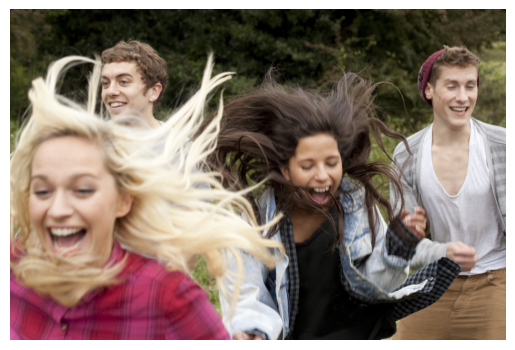

In [18]:
plt.imshow(img1,cmap='gray')
plt.axis("off")
plt.show()

In [17]:
img1[1000][2000]

array([75, 70, 64], dtype=uint8)

In [23]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [24]:
data.class_names

['happy', 'sad']

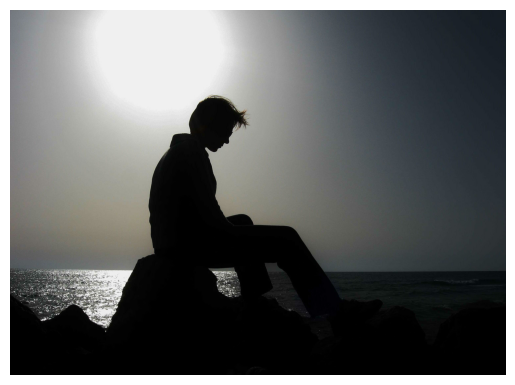

In [25]:
plt.imshow(plt.imread('./data/sad/504212.jpg'))
plt.axis("off")
plt.show()

In [26]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

In [27]:
batch[0].shape

(32, 256, 256, 3)

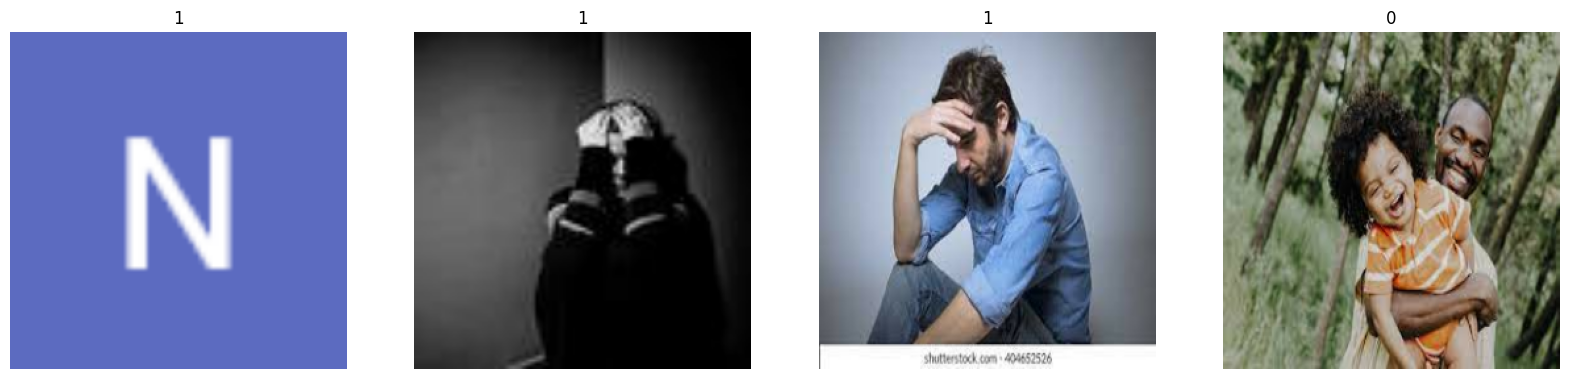

In [33]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    ax[idx].axis("off")

In [35]:
np.min(batch[0])

0.0

In [39]:
batch[0].shape

(32, 256, 256, 3)

In [46]:
scaled=batch[0]/255

In [52]:
data=data.map(lambda x,y:(x/255,y))

In [51]:
list(map(lambda x:(x+10),[2,5,15,7]))

[12, 15, 25, 17]

In [56]:
scaled_iterator=data.as_numpy_iterator()

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                zoom_range=0.2,horizontal_flip=True)
df=train_datagen.flow_from_directory('./data/',target_size=(64,64),
                                    batch_size=32,class_mode='binary')

Found 305 images belonging to 2 classes.


In [67]:
model=tf.keras.Sequential()

In [68]:
model.add(tf.keras.layers.Conv2D(activation='relu',filters=32,
                                kernel_size=3,input_shape=[64,64,3]))

/home/lirak/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [71]:
model.add(tf.keras.layers.Flatten())

In [72]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [73]:
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

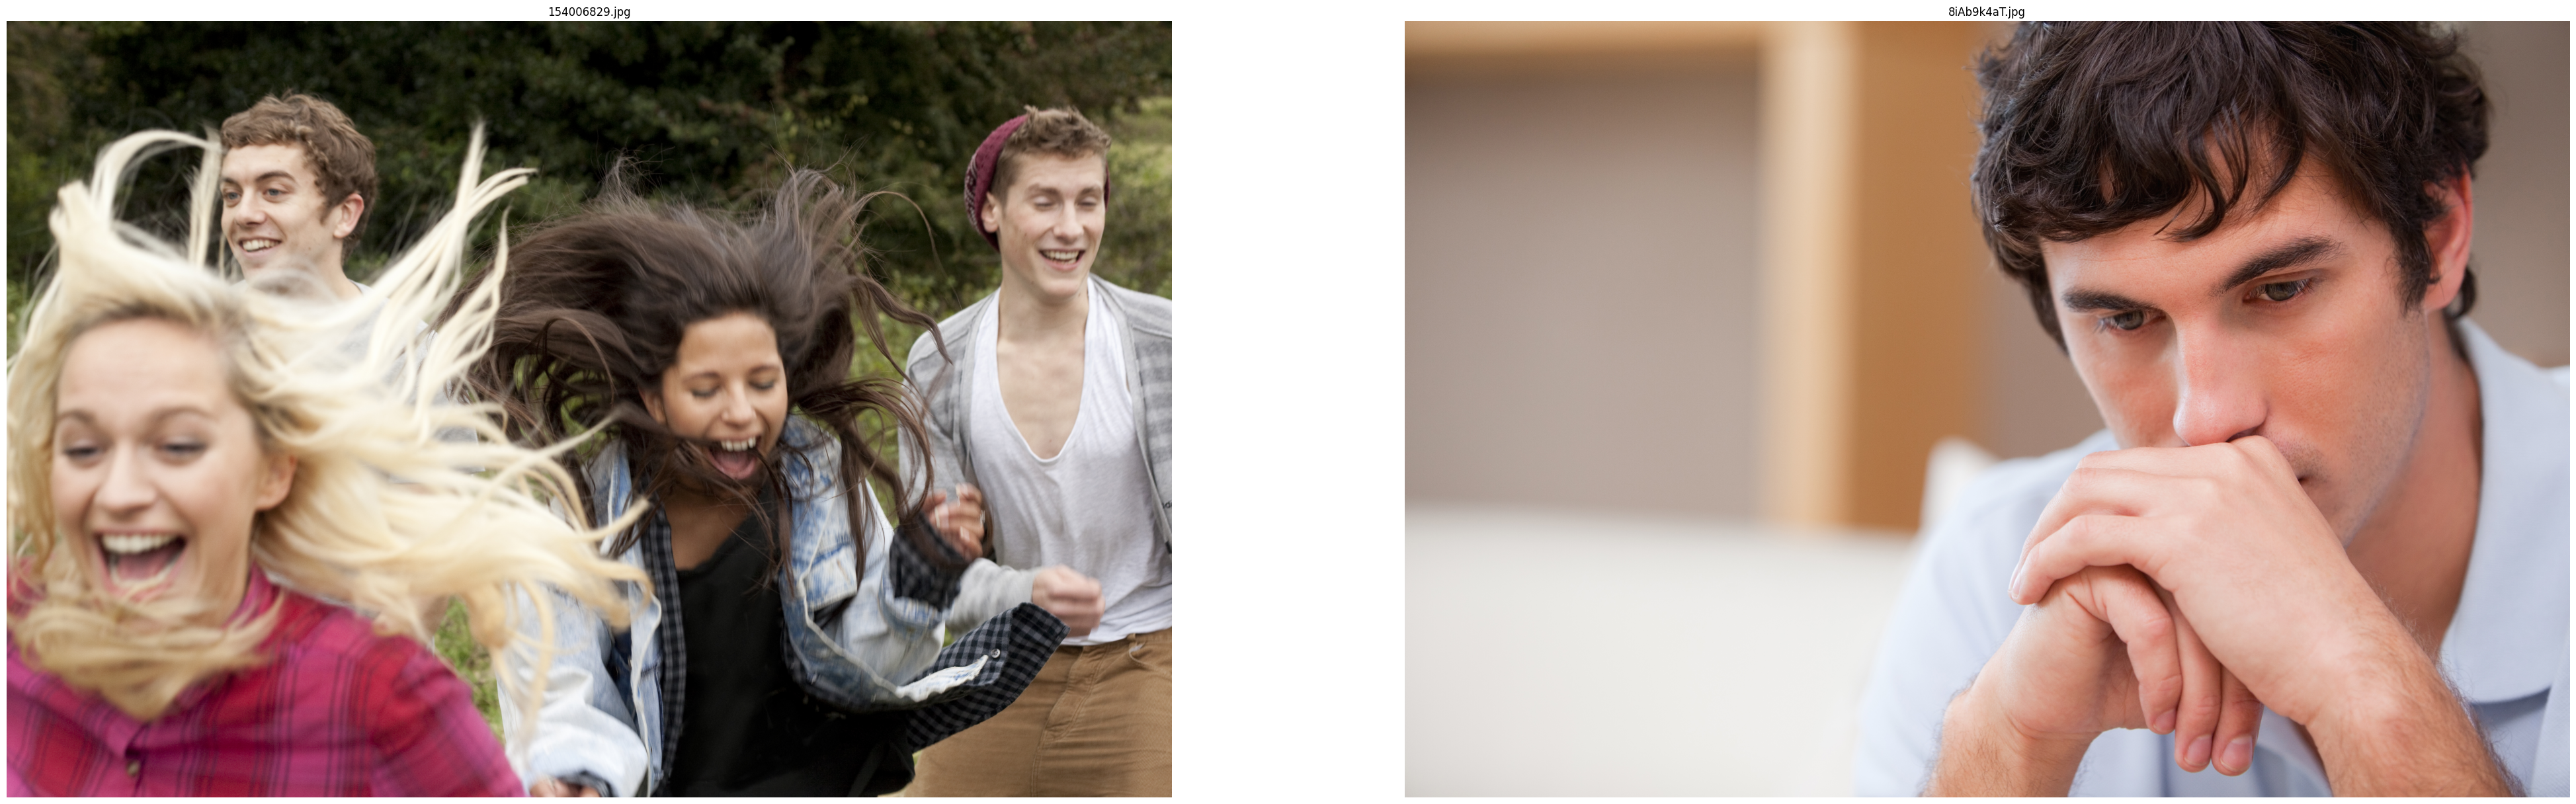

In [92]:
fig,ax=plt.subplots(ncols=2,figsize=(50,50))
count=0
for i in os.listdir('./'):
    if i.endswith(".jpg"):
        test_img=plt.imread(f'./{i}')
        ax[count].imshow(test_img)
        ax[count].title.set_text(i)
        ax[count].axis("off")
        count+=1
plt.show()

In [80]:
model.fit(x=df,epochs=40)

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.4632 - loss: 0.8412
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - accuracy: 0.5768 - loss: 0.6822
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 414ms/step - accuracy: 0.6035 - loss: 0.6595
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.5719 - loss: 0.6888
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.6682 - loss: 0.6542
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.6721 - loss: 0.5865
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 353ms/step - accuracy: 0.7309 - loss: 0.5299
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.8251 - loss: 0.4522
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.7944 - loss: 0.4888
Epoch 10/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.8087 - loss: 0.4615
Epoch 11/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.7534 - loss: 0.4639
Epoch 12/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step

In [98]:
indices={0.0:"happy",1.0:"sad"}

In [81]:
from keras.preprocessing import image

In [87]:
def convert_img(path):
    test_image=image.load_img(path,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    return test_image

In [88]:
result1=model.predict(convert_img('./8iAb9k4aT.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [102]:
print(indices[result1[0][0]])

sad


In [101]:
print(indices[model.predict(convert_img('./happiest.jpg'))[0][0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
happy


In [100]:
print(indices[model.predict(convert_img('./data/sad.jpeg'))[0][0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
happy
